In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, auc, roc_curve, plot_roc_curve
from sklearn.cluster import KMeans
from collections import Counter
from scipy import stats
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
df = pd.read_csv("../data/wdbc.data", header = None, index_col = False)
df = df.iloc[:,1:]
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
df.iloc[:,0].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [4]:
df.isna().any().any()

False

In [5]:
df.shape

(569, 31)

## (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [6]:
X, y = df.iloc[:,1:], df.iloc[:,0]
LE = LabelEncoder()
y = LE.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
Counter(y_test)

Counter({1: 42, 0: 72})

In [8]:
X_test.head(10)

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
180,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,0.05770,...,33.12,32.85,220.80,3216.0,0.1472,0.40340,0.53400,0.26880,0.2856,0.08082
92,13.270,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.026480,0.1386,0.05318,...,16.36,22.35,104.50,830.6,0.1006,0.12380,0.13500,0.10010,0.2027,0.06206
211,11.840,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.013930,0.1533,0.06057,...,13.30,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993
416,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.012570,0.2025,0.06601,...,10.85,31.24,68.73,359.4,0.1526,0.11930,0.06141,0.03770,0.2872,0.08304
460,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.064310,0.1793,0.06281,...,22.96,34.49,152.10,1648.0,0.1600,0.24440,0.26390,0.15550,0.3010,0.09060
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.149600,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.67800,0.29030,0.4098,0.12840
316,12.180,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,...,12.85,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037
357,13.870,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.020880,0.1424,0.05883,...,15.11,25.58,96.74,694.4,0.1153,0.10080,0.05285,0.05556,0.2362,0.07113
297,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.035150,0.1619,0.06287,...,13.36,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
379,11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.063670,0.2196,0.07950,...,13.24,32.82,91.76,508.1,0.2184,0.93790,0.84020,0.25240,0.4154,0.14030


In [9]:
steps = [('scaler', MinMaxScaler()),
         ('SVM',  LinearSVC(penalty='l1', dual=False, tol=1e-2))]
pipeline = Pipeline(steps)

parameters = {'SVM__C': np.logspace(-10, 10, 20)}

cv = GridSearchCV(pipeline, param_grid = parameters, cv = 5, scoring='accuracy',return_train_score=True, refit=True, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM',
                                        LinearSVC(dual=False, penalty='l1',
                                                  tol=0.01))]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.00000000e-10, 1.12883789e-09, 1.27427499e-08, 1.43844989e-07,
       1.62377674e-06, 1.83298071e-05, 2.06913808e-04, 2.33572147e-03,
       2.63665090e-02, 2.97635144e-01, 3.35981829e+00, 3.79269019e+01,
       4.28133240e+02, 4.83293024e+03, 5.45559478e+04, 6.15848211e+05,
       6.95192796e+06, 7.84759970e+07, 8.85866790e+08, 1.00000000e+10])},
             return_train_score=True, scoring='accuracy')

In [10]:
best_model = cv.best_estimator_
print(cv.best_score_)
print(cv.best_params_)

0.9692307692307693
{'SVM__C': 3.359818286283774}


Train Accuracy 0.7428571428571429
Train Precision 0.45294117647058824
Train Recall Score 0.7623762376237624
Train F1 Score 0.5682656826568265
Train AUC Score 0.7498321866084915
Train Confusion Matrix [[261  93]
 [ 24  77]]


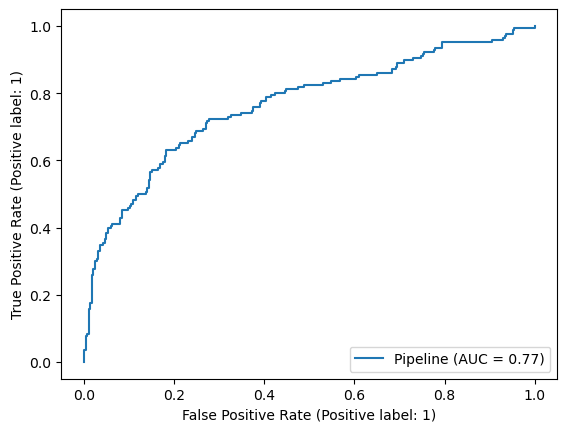

Test Accuracy 0.7280701754385965
Test Precision 0.40476190476190477
Test Recall Score 0.7391304347826086
Test F1 Score 0.523076923076923
Test AUC Score 0.7322025800286669
Test Confusion Matrix [[66 25]
 [ 6 17]]


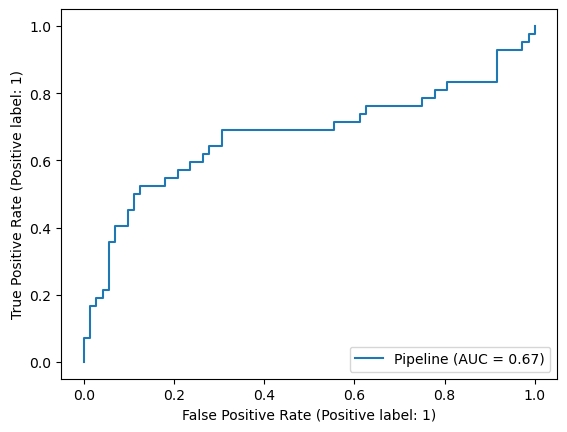

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ypreds = best_model.predict(X_train_scaled)
yhat = best_model.predict(X_test_scaled)

print("Train Accuracy", accuracy_score(ypreds, y_train))
print("Train Precision", precision_score(ypreds, y_train))
print("Train Recall Score", recall_score(ypreds, y_train))
print("Train F1 Score", f1_score(ypreds, y_train))
print("Train AUC Score", roc_auc_score(ypreds, y_train))
print("Train Confusion Matrix", confusion_matrix(ypreds, y_train))
plot_roc_curve(best_model, X_train_scaled, y_train) 
plt.show()

print("Test Accuracy", accuracy_score(yhat, y_test))
print("Test Precision", precision_score(yhat, y_test))
print("Test Recall Score", recall_score(yhat, y_test))
print("Test F1 Score", f1_score(yhat, y_test))
print("Test AUC Score", roc_auc_score(yhat, y_test))
print("Test Confusion Matrix", confusion_matrix(yhat, y_test))
plot_roc_curve(best_model, X_test_scaled, y_test) 
plt.show()

In [12]:
train_metrics = []
test_metrics = []
for m in range(30):
#     print("Running Monte Carlo Simulation -- ",m+1)
#     X, y = df.iloc[:,1:], df.iloc[:,0]
#     LE = LabelEncoder()
#     y = LE.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    steps = [('scaler', MinMaxScaler()),
         ('SVM',  LinearSVC(penalty='l1', dual=False, tol=1e-2))]
    pipeline = Pipeline(steps)

    parameters = {'SVM__C': np.logspace(-10, 10, 20)}

    cv = GridSearchCV(pipeline, param_grid = parameters, cv = 5, scoring='accuracy',return_train_score=True, refit=True, n_jobs=-1)
    cv.fit(X_train, y_train)
    best_model = cv.best_estimator_
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ypreds = best_model.predict(X_train_scaled)
    yhat = best_model.predict(X_test_scaled)
    
    temp1 = []
    temp1.append(accuracy_score(ypreds, y_train))
    temp1.append(precision_score(ypreds, y_train))
    temp1.append(recall_score(ypreds, y_train))
    temp1.append(f1_score(ypreds, y_train))
    try:
        temp1.append(roc_auc_score(ypreds, y_train))
    except:
        temp1.append(0)
    
    temp2 = []
    temp2.append(accuracy_score(yhat, y_test))
    temp2.append(precision_score(yhat, y_test))
    temp2.append(recall_score(yhat, y_test))
    temp2.append(f1_score(yhat, y_test))
    try:
        temp2.append(roc_auc_score(yhat, y_test))
    except:
        temp2.append(0)
    train_metrics.append(temp1)
    test_metrics.append(temp2)
print("*"*60)
print("Average Train Accuracy", np.asarray([x[0] for x in train_metrics]).mean())
print("Average Train Precision", np.asarray([x[1] for x in train_metrics]).mean())
print("Average Train Recall Score", np.asarray([x[2] for x in train_metrics]).mean())
print("Average Train F1 Score", np.asarray([x[3] for x in train_metrics]).mean())
print("Average Train AUC Score", np.asarray([x[4] for x in train_metrics]).mean())

print("Average Test Accuracy", np.asarray([x[0] for x in test_metrics]).mean())
print("Average Test Precision", np.asarray([x[1] for x in test_metrics]).mean())
print("Average Test Recall Score", np.asarray([x[2] for x in test_metrics]).mean())
print("Average Test F1 Score", np.asarray([x[3] for x in test_metrics]).mean())
print("Average Test AUC Score", np.asarray([x[4] for x in test_metrics]).mean())
print("*"*60)

************************************************************
Average Train Accuracy 0.7213186813186815
Average Train Precision 0.321764705882353
Average Train Recall Score 0.8745046669715744
Average Train F1 Score 0.39361497336051704
Average Train AUC Score 0.7865922686565892
Average Test Accuracy 0.7242690058479533
Average Test Precision 0.32619047619047614
Average Test Recall Score 0.7773716731013257
Average Test F1 Score 0.38953314885128354
Average Test AUC Score 0.709839802884048
************************************************************


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.B. Findtheunlabeleddatapointthatisthefarthesttothedecisionboundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [14]:
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)

Train Accuracy 0.7142857142857143
Train Precision 0.23076923076923078
Train Recall Score 1.0
Train F1 Score 0.375
Train AUC Score 0.84375
Train Confusion Matrix [[286 130]
 [  0  39]]


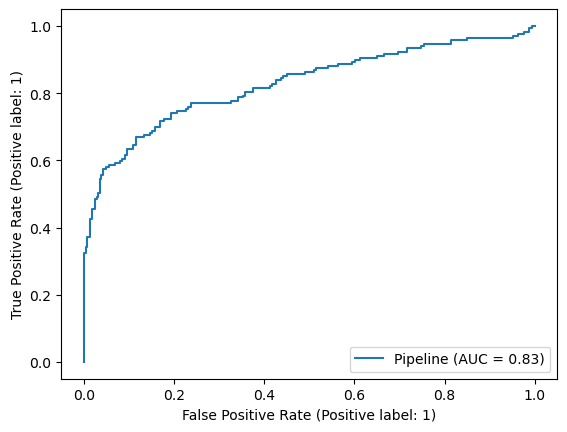

Test Accuracy 0.7280701754385965
Test Precision 0.2619047619047619
Test Recall Score 1.0
Test F1 Score 0.41509433962264153
Test AUC Score 0.8495145631067962
Test Confusion Matrix [[72 31]
 [ 0 11]]


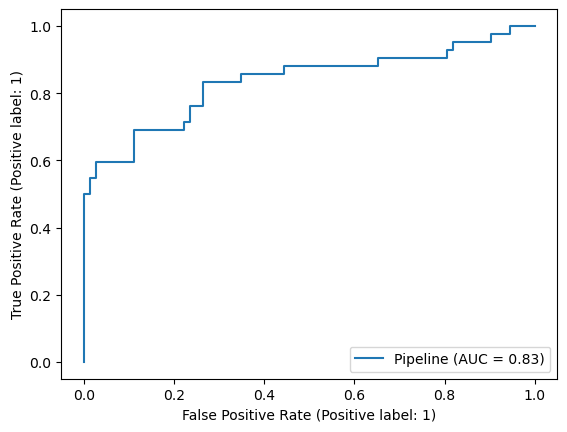

In [15]:
steps = [('scaler', MinMaxScaler()),
         ('SVM',  LinearSVC(penalty='l1', dual=False, tol=1e-2))]
pipeline = Pipeline(steps)

parameters = {'SVM__C': np.logspace(-10, 10, 20)}

while len(X_test_unlab) > 0:
    cv = GridSearchCV(pipeline, param_grid = parameters, cv = 5, scoring='accuracy',return_train_score=True, refit=True, n_jobs=-1)
    cv.fit(X_train_lab, y_train_lab)
    best_model = cv.best_estimator_

    reqIdx = np.argmax(np.abs(best_model.decision_function(X_test_unlab)))
    pred = best_model.predict(X_test_unlab.iloc[reqIdx].values.reshape(1,-1))
    X_train_lab = X_train_lab.append(X_test_unlab.iloc[reqIdx])
    y_train_lab = np.append(y_train_lab, pred[0])
    X_test_unlab = X_test_unlab.drop(index=X_test_unlab.index[reqIdx])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_lab) #on labeled test set
X_test_scaled = scaler.transform(X_test)
ypreds = best_model.predict(X_train_scaled)
yhat = best_model.predict(X_test_scaled)

print("Train Accuracy", accuracy_score(ypreds, y_train_lab))
print("Train Precision", precision_score(ypreds, y_train_lab))
print("Train Recall Score", recall_score(ypreds, y_train_lab))
print("Train F1 Score", f1_score(ypreds, y_train_lab))
try:
    print("Train AUC Score", roc_auc_score(ypreds, y_train_lab))
except:
    print("Train AUC Score", 0)
print("Train Confusion Matrix", confusion_matrix(ypreds, y_train_lab))
plot_roc_curve(best_model, X_train_scaled, y_train_lab) 
plt.show()

print("Test Accuracy", accuracy_score(yhat, y_test))
print("Test Precision", precision_score(yhat, y_test))
print("Test Recall Score", recall_score(yhat, y_test))
print("Test F1 Score", f1_score(yhat, y_test))
try:
    print("Test AUC Score", roc_auc_score(yhat, y_test))
except:
    print("Test AUC Score", 0)
print("Test Confusion Matrix", confusion_matrix(yhat, y_test))
plot_roc_curve(best_model, X_test_scaled, y_test) 
plt.show()

In [16]:
train_metrics = []
test_metrics = []
for m in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)
    
    steps = [('scaler', MinMaxScaler()),
         ('SVM',  LinearSVC(penalty='l1', dual=False, tol=1e-2))]
    pipeline = Pipeline(steps)

    parameters = {'SVM__C': np.logspace(-10, 10, 20)}

    while len(X_test_unlab) > 0:
        cv = GridSearchCV(pipeline, param_grid = parameters, cv = 5, scoring='accuracy',return_train_score=True, refit=True, n_jobs=-1)
        cv.fit(X_train_lab, y_train_lab)
        best_model = cv.best_estimator_

        reqIdx = np.argmax(np.abs(best_model.decision_function(X_test_unlab)))
        pred = best_model.predict(X_test_unlab.iloc[reqIdx].values.reshape(1,-1))
        X_train_lab = X_train_lab.append(X_test_unlab.iloc[reqIdx])
        y_train_lab = np.append(y_train_lab, pred[0])
        X_test_unlab = X_test_unlab.drop(index=X_test_unlab.index[reqIdx])

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_lab) #on labeled test set
    X_test_scaled = scaler.transform(X_test)
    ypreds = best_model.predict(X_train_scaled)
    yhat = best_model.predict(X_test_scaled)
    
    temp1 = []
    temp1.append(accuracy_score(ypreds, y_train))
    temp1.append(precision_score(ypreds, y_train))
    temp1.append(recall_score(ypreds, y_train))
    temp1.append(f1_score(ypreds, y_train))
    try:
        temp1.append(roc_auc_score(ypreds, y_train))
    except:
        temp1.append(0)
    
    temp2 = []
    temp2.append(accuracy_score(yhat, y_test))
    temp2.append(precision_score(yhat, y_test))
    temp2.append(recall_score(yhat, y_test))
    temp2.append(f1_score(yhat, y_test))
    try:
        temp2.append(roc_auc_score(yhat, y_test))
    except:
        temp2.append(0)
    train_metrics.append(temp1)
    test_metrics.append(temp2)

print("*"*60)
print("Average Train Accuracy", np.asarray([x[0] for x in train_metrics]).mean())
print("Average Train Precision", np.asarray([x[1] for x in train_metrics]).mean())
print("Average Train Recall Score", np.asarray([x[2] for x in train_metrics]).mean())
print("Average Train F1 Score", np.asarray([x[3] for x in train_metrics]).mean())
print("Average Train AUC Score", np.asarray([x[4] for x in train_metrics]).mean())

print("Average Test Accuracy", np.asarray([x[0] for x in test_metrics]).mean())
print("Average Test Precision", np.asarray([x[1] for x in test_metrics]).mean())
print("Average Test Recall Score", np.asarray([x[2] for x in test_metrics]).mean())
print("Average Test F1 Score", np.asarray([x[3] for x in test_metrics]).mean())
print("Average Test AUC Score", np.asarray([x[4] for x in test_metrics]).mean())
print("*"*60)

************************************************************
Average Train Accuracy 0.5800732600732601
Average Train Precision 0.1784313725490196
Average Train Recall Score 0.36396952078135253
Average Train F1 Score 0.1765848519005049
Average Train AUC Score 0.46384978144217565
Average Test Accuracy 0.7149122807017545
Average Test Precision 0.3484126984126984
Average Test Recall Score 0.7591904704566896
Average Test F1 Score 0.3647230068703539
Average Test AUC Score 0.7085052234304675
************************************************************


### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2. 
### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum? 
### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1
### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [31]:
km = KMeans(n_clusters=2, n_init = 2000).fit(X_train)

In [32]:
centers = km.cluster_centers_

array([[1.25747826e+01, 1.86531014e+01, 8.12346377e+01, 4.97525217e+02,
        9.47757391e-02, 9.12987246e-02, 6.28391441e-02, 3.33645101e-02,
        1.78562609e-01, 6.33764058e-02, 3.02712174e-01, 1.22588580e+00,
        2.14304812e+00, 2.36191188e+01, 7.02750145e-03, 2.35038638e-02,
        2.91801699e-02, 1.05647855e-02, 2.08464522e-02, 3.68324725e-03,
        1.40551391e+01, 2.48535652e+01, 9.20337391e+01, 6.20509855e+02,
        1.29514986e-01, 2.25400725e-01, 2.22142223e-01, 9.13133362e-02,
        2.85346957e-01, 8.30528696e-02],
       [1.93899091e+01, 2.17280909e+01, 1.28155455e+02, 1.18701091e+03,
        1.00914818e-01, 1.45570455e-01, 1.73990364e-01, 9.97259091e-02,
        1.90915455e-01, 6.02000909e-02, 7.28834545e-01, 1.19608727e+00,
        5.16539091e+00, 9.43910909e+01, 6.38696364e-03, 3.08485182e-02,
        4.06430000e-02, 1.52341273e-02, 2.03073636e-02, 3.77110000e-03,
        2.38016364e+01, 2.91462727e+01, 1.58803636e+02, 1.76745455e+03,
        1.40694727e-01,

Train Accuracy 0.9934065934065934
Train Precision 0.9823529411764705
Train Recall Score 1.0
Train F1 Score 0.9910979228486646
Train AUC Score 0.9947916666666667
Train Confusion Matrix [[285   3]
 [  0 167]]


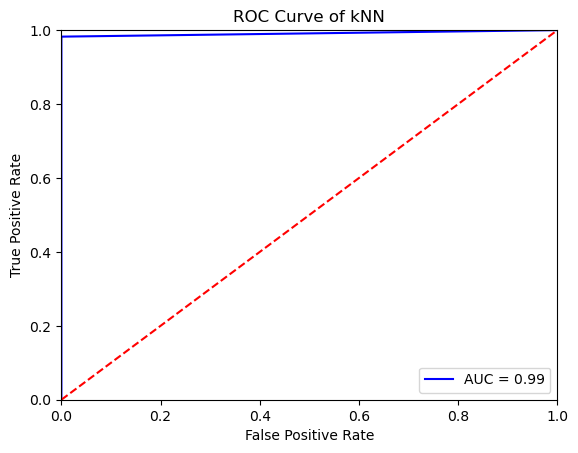

In [83]:
for cluster in [0,1]:
    d = km.transform(X_train)[:, cluster]
    ind = np.argsort(d)[::-1][:30]
    maj_label = stats.mode(y_train[ind].flatten())[0][0]
    ypred = np.array(y_train)
    ypred[ind] = maj_label

print("Train Accuracy", accuracy_score(ypred, y_train))
print("Train Precision", precision_score(ypred, y_train))
print("Train Recall Score", recall_score(ypred, y_train))
print("Train F1 Score", f1_score(ypred, y_train))
try:
    print("Train AUC Score", roc_auc_score(ypred, y_train))
except:
    print("Train AUC Score", 0)
print("Train Confusion Matrix", confusion_matrix(ypred, y_train))
fpr, tpr, threshold = roc_curve(y_train, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

Test Accuracy 0.8070175438596491
Test Precision 0.47619047619047616
Test Recall Score 1.0
Test F1 Score 0.6451612903225806
Test AUC Score 0.8829787234042553
Test Confusion Matrix [[72 22]
 [ 0 20]]


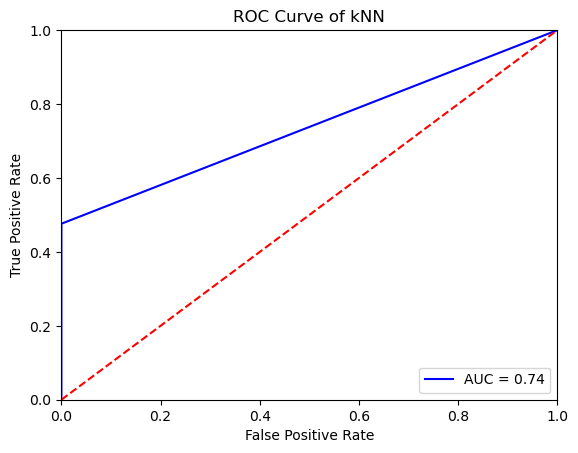

In [84]:
yhat = km.predict(X_test)
print("Test Accuracy", accuracy_score(yhat, y_test))
print("Test Precision", precision_score(yhat, y_test))
print("Test Recall Score", recall_score(yhat, y_test))
print("Test F1 Score", f1_score(yhat, y_test))
try:
    print("Test AUC Score", roc_auc_score(yhat, y_test))
except:
    print("Test AUC Score", 0)
print("Test Confusion Matrix", confusion_matrix(yhat, y_test))
fpr, tpr, threshold = roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [ ]:
train_metrics = []
test_metrics = []
for m in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    km = KMeans(n_clusters=2, n_init = 2000).fit(X_train)
    centers = km.cluster_centers_
    for cluster in [0,1]:
        d = km.transform(X_train)[:, cluster]
        ind = np.argsort(d)[::-1][:30]
        maj_label = stats.mode(y_train[ind].flatten())[0][0]
        ypreds = np.array(y_train)
        ypreds[ind] = maj_label
    yhat = km.predict(X_test)
    
    temp1 = []
    temp1.append(accuracy_score(ypreds, y_train))
    temp1.append(precision_score(ypreds, y_train))
    temp1.append(recall_score(ypreds, y_train))
    temp1.append(f1_score(ypreds, y_train))
    fpr, tpr, threshold = roc_curve(y_train, ypreds, pos_label=1)
    temp1.append(auc(fpr,tpr))
    
    temp2 = []
    temp2.append(accuracy_score(yhat, y_test))
    temp2.append(precision_score(yhat, y_test))
    temp2.append(recall_score(yhat, y_test))
    temp2.append(f1_score(yhat, y_test))
    fpr, tpr, threshold = roc_curve(y_test, yhat, pos_label=1)
    temp2.append(auc(fpr,tpr))
    
    train_metrics.append(temp1)
    test_metrics.append(temp2)
print("*"*60)
print("Average Train Accuracy", np.asarray([x[0] for x in train_metrics]).mean())
print("Average Train Precision", np.asarray([x[1] for x in train_metrics]).mean())
print("Average Train Recall Score", np.asarray([x[2] for x in train_metrics]).mean())
print("Average Train F1 Score", np.asarray([x[3] for x in train_metrics]).mean())
print("Average Train AUC Score", np.asarray([x[4] for x in train_metrics]).mean())

print("Average Test Accuracy", np.asarray([x[0] for x in test_metrics]).mean())
print("Average Test Precision", np.asarray([x[1] for x in test_metrics]).mean())
print("Average Test Recall Score", np.asarray([x[2] for x in test_metrics]).mean())
print("Average Test F1 Score", np.asarray([x[3] for x in test_metrics]).mean())
print("Average Test AUC Score", np.asarray([x[4] for x in test_metrics]).mean())
print("*"*60)